In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from boptest_integration.interface import Interface

CONFIG = {
    "testcase_name": "testcase1",
    "initialize":  # for GET/initialize
        {
            "start_time": 0,
            "warmup_period": 0
        },
    "scenario": None,
    "step": 300,
    "length": 86400,

    "controller":
        {
            "type": "pid",  # currently support "pid", "sup", pidTwoZones"
            "u":
                {
                    "oveAct_u": 0,
                    "oveAct_activate": 1
                }
        }
}


config: dict = CONFIG
interface = Interface(config=config)
kpi, res, forecasts, custom_kpi_result = interface.run_workflow()

INFO:root:=========== run_workflow
INFO:root:
TEST CASE INFORMATION
---------------------
INFO:root:Name:				testcase1
INFO:root:Control Inputs:			{'oveAct_activate': {'Description': 'Activation for Heater thermal power', 'Maximum': None, 'Minimum': None, 'Unit': None}, 'oveAct_u': {'Description': 'Heater thermal power', 'Maximum': 10000.0, 'Minimum': -10000.0, 'Unit': 'W'}}
INFO:root:Measurements:			{'CO2RooAir_y': {'Description': 'Zone air CO2 concentration', 'Maximum': None, 'Minimum': None, 'Unit': 'ppm'}, 'PHea_y': {'Description': 'Heater power', 'Maximum': None, 'Minimum': None, 'Unit': 'W'}, 'TRooAir_y': {'Description': 'Zone air temperature', 'Maximum': None, 'Minimum': None, 'Unit': 'K'}}
INFO:root:Default Control Step:	300.0
INFO:root:Initializing test case simulation.
INFO:root:RESULT: {'CO2RooAir_y': 750.0, 'PHea_y': 0.0, 'TRooAir_y': 293.15, 'oveAct_activate': 0.0, 'oveAct_u': 0.0, 'time': 0.0}
INFO:root:Successfully initialized the simulation
INFO:root:
Running test case.

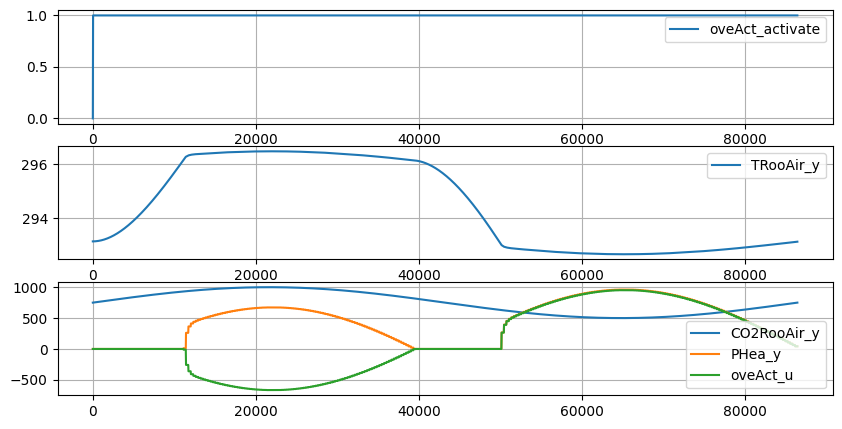

In [19]:
# key ['CO2RooAir_y', 'PHea_y', 'TRooAir_y', 'oveAct_activate', 'oveAct_u', 'time'])
ts = res["payload"]["time"]
CO2RooAir_y = res["payload"]["CO2RooAir_y"]
PHea_y = res["payload"]["PHea_y"]
TRooAir_y = res["payload"]["TRooAir_y"]
oveAct_activate = res["payload"]["oveAct_activate"]
oveAct_u = res["payload"]["oveAct_u"]

fig, axs = plt.subplots(3, 1, figsize=(10,5))

axs[0].plot(ts, oveAct_activate, label="oveAct_activate")
axs[0].legend()
axs[0].grid()

axs[1].plot(ts, TRooAir_y, label="TRooAir_y")
axs[1].legend()
axs[1].grid()

axs[2].plot(ts, CO2RooAir_y, label="CO2RooAir_y")
axs[2].plot(ts, PHea_y, label="PHea_y")
# plt.plot(ts, TRooAir_y, label="TRooAir_y")
plt.plot(ts, oveAct_u, label="oveAct_u")
axs[2].legend()
axs[2].grid()
